In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

In [100]:
def truncate(number, decimals=0):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor

In [6]:
qa_1 = "data/log_02_03_2021__13_21_11/params_qa1000_186fa12e-b4ce-4959-a24d-14ced226447c.json"
qa_2 = "data/log_02_03_2021__13_23_17/params_qa1000_bb679a90-5a36-4859-b796-c356de253ad5.json"
qa_3 = "data/log_02_03_2021__13_24_29/params_qa1000_d3c8dd7e-91ce-4d14-8bd7-565dfc617050.json"

In [10]:
sa_1 = "data/log_02_03_2021__13_21_11/params_sa_1_-22.0_1000.json"
sa_2 = "data/log_02_03_2021__13_23_17/params_sa_1_-22.0_1000.json"
sa_3 = "data/log_02_03_2021__13_24_29/params_sa_1_-22.0_1000.json"

In [7]:
# reads it back
with open(qa_1,"r") as f:
  data = f.read()

# decoding the JSON to dictionay
d = json.loads(data)


In [9]:
d.keys()

dict_keys(['bqm', 'embdding', 'num_reads', 'result', 'sampler_properties'])

In [13]:
with open(sa_1,"r") as f:
  data = f.read()
sa_1_json = json.loads(data)
with open(sa_2,"r") as f:
  data = f.read()
sa_2_json = json.loads(data)
with open(sa_3,"r") as f:
  data = f.read()
sa_3_json = json.loads(data)

<Figure size 432x288 with 0 Axes>

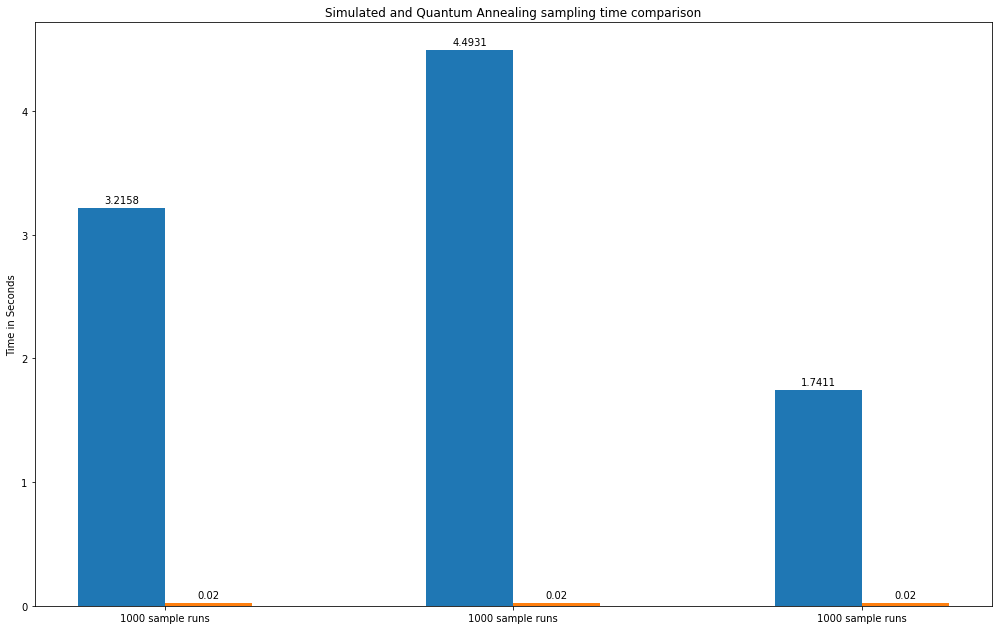

In [127]:
t1 = np.array([1000, 3000, 5000])
t2 = np.array([truncate(sa_1_json['annealing_time'],4), truncate(sa_2_json['annealing_time'],4), truncate(sa_3_json['annealing_time'],4)])
t3 = np.array([0.02,0.02,0.02])

plt.figure(1)
fig, ax = plt.subplots()
rects1 = ax.bar(t1-250, t2, width=500, label='Simualted Annealing')
rects2 = ax.bar(t1+250, t3, width=500, label='Quantum Annealing')
plt.xticks(t1, ('1000 sample runs', '1000 sample runs', '1000 sample runs'))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time in Seconds')
ax.set_title('Simulated and Quantum Annealing sampling time comparison')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

        
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()